In [19]:
import csv

def print_rows_with_headers(csv_filename, filters):
    matched_rows = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        
        headers = next(reader)
        
        header_indices = {}
        for header_name, header_values in filters.items():
            try:
                header_indices[header_name] = headers.index(header_name)
            except ValueError:
                print(f"Header '{header_name}' not found in the CSV file.")
                return
        
        for row in reader:
            match = True
            for header_name, header_values in filters.items():
                if header_name == 'Year':
                    if row[header_indices[header_name]] not in header_values:
                        match = False
                        break
                else:
                    if row[header_indices[header_name]] not in header_values:
                        match = False
                        break
            
            if match:
                matched_rows.append(row)
                print(row)
    
    # Print total number of matched rows
    print(f"Total rows matching the criteria(s): {len(matched_rows)}")

csv_filename = 'annual-enterprise-survey-2023-financial-year-provisional.csv'
# Add more parameters to find more cases for each header
filters = {
    'Industry_aggregation_NZSIOC': ['Level 1', 'Level 3'],
    'Industry_code_NZSIOC': ['AA', '99999'],
    'Year': ['2023', '2022'],
}

print("Rows where the following headers match their respective values:")
for header, values in filters.items():
    value_str = ', '.join(values) if isinstance(values, list) else values
    print(f"  '{header}' in {value_str}")

print_rows_with_headers(csv_filename, filters)


Rows where the following headers match their respective values:
  'Industry_aggregation_NZSIOC' in Level 1, Level 3
  'Industry_code_NZSIOC' in AA, 99999
  'Year' in 2023, 2022
['2023', 'Level 1', '99999', 'All industries', 'Dollars (millions)', 'H01', 'Total income', 'Financial performance', '930995', 'ANZSIC06 divisions A-S (excluding classes K6330, L6711, O7552, O760, O771, O772, S9540, S9601, S9602, and S9603)']
['2023', 'Level 1', '99999', 'All industries', 'Dollars (millions)', 'H04', 'Sales, government funding, grants and subsidies', 'Financial performance', '821630', 'ANZSIC06 divisions A-S (excluding classes K6330, L6711, O7552, O760, O771, O772, S9540, S9601, S9602, and S9603)']
['2023', 'Level 1', '99999', 'All industries', 'Dollars (millions)', 'H05', 'Interest, dividends and donations', 'Financial performance', '84354', 'ANZSIC06 divisions A-S (excluding classes K6330, L6711, O7552, O760, O771, O772, S9540, S9601, S9602, and S9603)']
['2023', 'Level 1', '99999', 'All indus

Rows where the following headers match their respective values:
  'Industry_aggregation_NZSIOC' in Level 1, Level 4
  'Industry_code_NZSIOC' in AA, AA12, 99999, RS211
  'Year' in 2023, 2013
Total rows matching the criteria(s): 188
Category: Industry_aggregation_NZSIOC=Level 1, Industry_code_NZSIOC=99999, Year=2023, Count: 31
Category: Industry_aggregation_NZSIOC=Level 1, Industry_code_NZSIOC=AA, Year=2023, Count: 31
Category: Industry_aggregation_NZSIOC=Level 4, Industry_code_NZSIOC=RS211, Year=2023, Count: 32
Category: Industry_aggregation_NZSIOC=Level 1, Industry_code_NZSIOC=99999, Year=2013, Count: 31
Category: Industry_aggregation_NZSIOC=Level 1, Industry_code_NZSIOC=AA, Year=2013, Count: 31
Category: Industry_aggregation_NZSIOC=Level 4, Industry_code_NZSIOC=RS211, Year=2013, Count: 32


C:\Users\764108\AppData\Local\Temp\1\ipykernel_13340\846097540.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=df, palette='viridis')


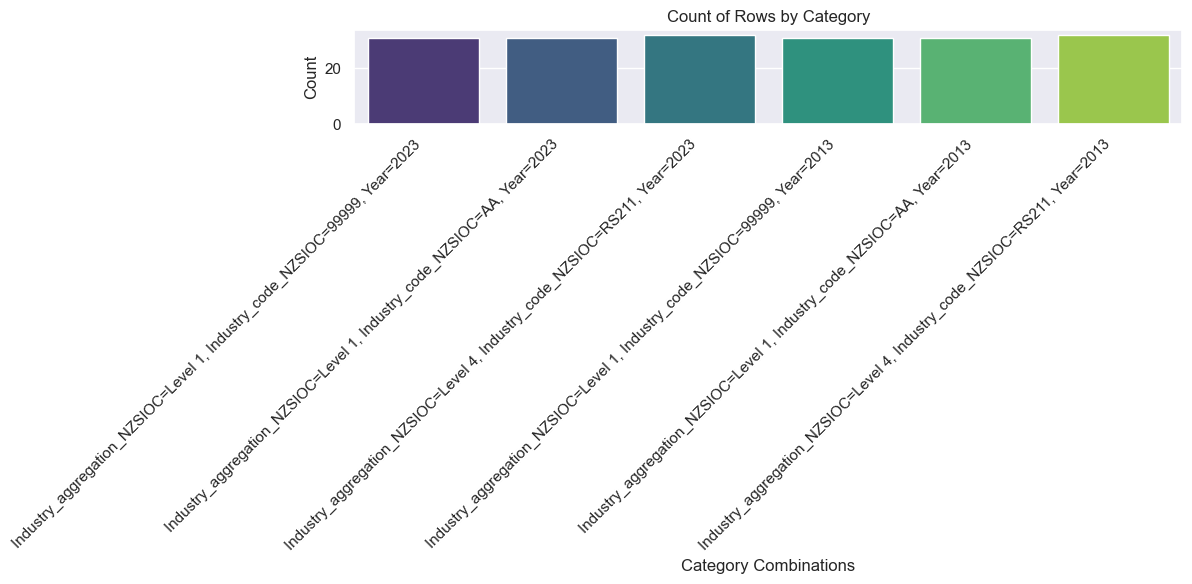

In [45]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from collections import defaultdict

def print_rows_with_headers(csv_filename, filters):
    matched_rows = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        
        headers = next(reader)
        
        header_indices = {}
        for header_name in filters.keys():
            try:
                header_indices[header_name] = headers.index(header_name)
            except ValueError:
                print(f"Header '{header_name}' not found in the CSV file.")
                return headers, matched_rows
        
        for row in reader:
            match = True
            for header_name, header_values in filters.items():
                if row[header_indices[header_name]] not in header_values:
                    match = False
                    break
            
            if match:
                matched_rows.append(row)
    
    # Print total number of matched rows
    print(f"Total rows matching the criteria(s): {len(matched_rows)}")
    
    return headers, matched_rows

def generate_permutations(filters):
    # Generate all permutations of filter values
    keys = list(filters.keys())
    values = list(filters.values())
    permutations = list(product(*values))
    return [{keys[i]: perm[i] for i in range(len(keys))} for perm in permutations]

def plot_category_counts(headers, matched_rows, filters):
    permutations = generate_permutations(filters)
    category_counts = defaultdict(int)

    for row in matched_rows:
        for perm in permutations:
            if all(row[headers.index(header)] == value for header, value in perm.items()):
                category_counts[tuple(perm.items())] += 1
    
    # Extract categories and counts for plotting
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    # Print the counts for debugging
    for category, count in zip(categories, counts):
        category_str = ', '.join(f"{key}={value}" for key, value in category)
        print(f"Category: {category_str}, Count: {count}")

    # Convert to DataFrame for Seaborn
    df = pd.DataFrame({
        'Category': [', '.join(f"{key}={value}" for key, value in cat) for cat in categories],
        'Count': counts
    })

    # Plotting using Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Count', data=df, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Category Combinations')
    plt.ylabel('Count')
    plt.title('Count of Rows by Category')
    plt.tight_layout()
    plt.show()

# Change the filters here
csv_filename = 'annual-enterprise-survey-2023-financial-year-provisional.csv'
filters = {
    'Industry_aggregation_NZSIOC': ['Level 1', 'Level 4'],
    'Industry_code_NZSIOC': ['AA', 'AA12', '99999', 'RS211'],
    'Year': ['2023', '2013'],
}

print("Rows where the following headers match their respective values:")
for header, values in filters.items():
    value_str = ', '.join(values) if isinstance(values, list) else values
    print(f"  '{header}' in {value_str}")

headers, matched_rows = print_rows_with_headers(csv_filename, filters)

# Plot counts for all permutations
plot_category_counts(headers, matched_rows, filters)


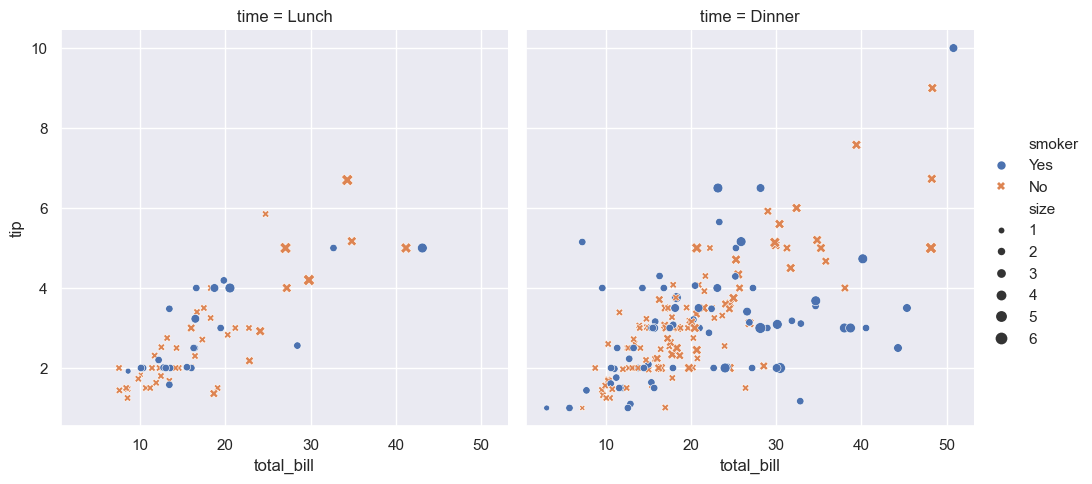

In [44]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)